In [49]:
# Import the required variables
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns

In [2]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [3]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [4]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

<Figure size 432x288 with 0 Axes>

In [50]:
# Read the data
Res_Nonhydro_Capita = pd.read_excel ("../data/processed/Res_Nonhydro_Capita.xlsx", index_col = 0)
SDGs_Ranks_2021 = pd.read_excel ("../data/processed/SDGs_Ranks_2021.xlsx", index_col = 0)
SDGs_Scores_2021 = pd.read_excel ("../data/processed/SDGs_Scores_2021.xlsx", index_col = 0)

In [51]:
Res_Nonhydro_Capita_2021 = Res_Nonhydro_Capita[[2021]]
Res_Nonhydro_Capita_2021= Res_Nonhydro_Capita_2021.rename(columns={ 2021: 'Res_Nonhydro_Capita_2021'})
Res_Nonhydro_Capita_2021

,Res_Nonhydro_Capita_2021
Country,
Afghanistan,1.139890
Algeria,16.641204
Angola,7.753307
Argentina,137.997210
Armenia,5.402285
...,...
"Venezuela, RB",2.721090
Vietnam,7.216691
"Yemen, Rep",18.517979


In [8]:
# columns_SDGs_Ranks_2021 = pd.Series(SDGs_Ranks_2021.columns)
# columns_SDGs_Scores_2021 = pd.Series(SDGs_Scores_2021.columns)
# difference = columns_SDGs_Ranks_2021.compare(columns_SDGs_Scores_2021)
# print("\nDifference between the series: \n",difference)

In [52]:
SDGs_Ranks_2021 = SDGs_Ranks_2021.iloc[:,1:]
SDGs_Ranks_2021

,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
Country,,,,,,,,,,,,,,,,,
Afghanistan,102,114,131,120,136,126,100,137,131,61,133,26,17,108,111,119,126
Algeria,58,94,75,65,96,97,73,101,58,14,105,38,60,95,118,63,18
Angola,132,96,130,128,104,115,114,126,130,115,124,18,32,34,71,122,112
Argentina,60,25,48,53,21,39,33,65,57,97,57,81,76,80,83,82,50
Armenia,71,68,62,67,90,76,14,84,81,73,75,35,49,110,80,28,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",131,126,92,90,69,44,38,63,86,121,122,64,78,51,52,137,68
Vietnam,63,15,83,48,45,64,82,55,62,48,63,19,44,104,129,78,72
"Yemen, Rep",116,131,121,122,137,136,104,131,127,80,127,23,26,13,127,135,99


In [54]:
SDGs_Scores_2021 = SDGs_Scores_2021.iloc[:,1:]
SDGs_Scores_2021

,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
Country,,,,,,,,,,,,,,,,
Afghanistan,50.131000,37.098357,57.851217,23.16250,46.3138,64.822500,37.753167,6.546833,65.436978,31.761250,90.816833,99.064667,48.422883,52.9840,52.026667,43.359500
Algeria,56.565571,75.578571,91.211000,53.71425,61.0340,86.727000,62.236167,45.405833,91.491000,57.699667,87.711833,90.150667,52.333333,51.4928,70.197700,74.101500
Angola,55.424125,37.443571,40.775667,51.27800,53.9610,52.432667,52.485500,7.517000,25.246500,46.711750,92.220167,96.520333,66.932000,64.7534,50.653600,47.766000
Argentina,67.543125,80.600000,95.269667,80.98550,79.0636,92.506667,70.275500,45.665000,38.402000,81.004500,76.391667,86.248667,57.281000,60.6662,65.167667,64.512750
Armenia,60.728143,77.907214,90.329000,57.48825,68.9572,94.821333,66.279400,34.402667,55.069000,76.444750,88.684667,93.073333,48.422883,61.7920,80.024778,62.190750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",43.225857,65.286786,82.244667,66.27800,78.1348,92.112000,70.762800,32.317333,21.608000,47.579667,81.572500,85.692000,64.511667,69.0270,34.133778,60.782000
Vietnam,71.032625,72.467429,97.107667,72.20325,73.1380,83.200333,72.149167,43.975667,70.499500,80.116250,91.899667,93.970000,49.192167,46.6890,65.960000,59.681250
"Yemen, Rep",40.703714,44.696429,55.689000,13.44000,38.4338,60.905000,49.294667,8.940167,48.930500,42.881500,91.545833,97.464000,77.505000,47.7480,37.058500,51.118333


# Res_Nonhydro_Capita_2021


In [55]:
Res_Nonhydro_Capita_2021

,Res_Nonhydro_Capita_2021
Country,
Afghanistan,1.139890
Algeria,16.641204
Angola,7.753307
Argentina,137.997210
Armenia,5.402285
...,...
"Venezuela, RB",2.721090
Vietnam,7.216691
"Yemen, Rep",18.517979


# Append target to the two datasets

In [56]:
SDGs_Ranks_2021 = pd.concat([SDGs_Ranks_2021, Res_Nonhydro_Capita_2021], axis=1)
SDGs_Ranks_2021


,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17,Res_Nonhydro_Capita_2021
Country,,,,,,,,,,,,,,,,,,
Afghanistan,102,114,131,120,136,126,100,137,131,61,133,26,17,108,111,119,126,1.139890
Algeria,58,94,75,65,96,97,73,101,58,14,105,38,60,95,118,63,18,16.641204
Angola,132,96,130,128,104,115,114,126,130,115,124,18,32,34,71,122,112,7.753307
Argentina,60,25,48,53,21,39,33,65,57,97,57,81,76,80,83,82,50,137.997210
Armenia,71,68,62,67,90,76,14,84,81,73,75,35,49,110,80,28,58,5.402285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",131,126,92,90,69,44,38,63,86,121,122,64,78,51,52,137,68,2.721090
Vietnam,63,15,83,48,45,64,82,55,62,48,63,19,44,104,129,78,72,7.216691
"Yemen, Rep",116,131,121,122,137,136,104,131,127,80,127,23,26,13,127,135,99,18.517979


In [57]:
SDGs_Scores_2021 = pd.concat([SDGs_Scores_2021, Res_Nonhydro_Capita_2021], axis=1)
SDGs_Scores_2021

,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17,Res_Nonhydro_Capita_2021
Country,,,,,,,,,,,,,,,,,
Afghanistan,50.131000,37.098357,57.851217,23.16250,46.3138,64.822500,37.753167,6.546833,65.436978,31.761250,90.816833,99.064667,48.422883,52.9840,52.026667,43.359500,1.139890
Algeria,56.565571,75.578571,91.211000,53.71425,61.0340,86.727000,62.236167,45.405833,91.491000,57.699667,87.711833,90.150667,52.333333,51.4928,70.197700,74.101500,16.641204
Angola,55.424125,37.443571,40.775667,51.27800,53.9610,52.432667,52.485500,7.517000,25.246500,46.711750,92.220167,96.520333,66.932000,64.7534,50.653600,47.766000,7.753307
Argentina,67.543125,80.600000,95.269667,80.98550,79.0636,92.506667,70.275500,45.665000,38.402000,81.004500,76.391667,86.248667,57.281000,60.6662,65.167667,64.512750,137.997210
Armenia,60.728143,77.907214,90.329000,57.48825,68.9572,94.821333,66.279400,34.402667,55.069000,76.444750,88.684667,93.073333,48.422883,61.7920,80.024778,62.190750,5.402285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",43.225857,65.286786,82.244667,66.27800,78.1348,92.112000,70.762800,32.317333,21.608000,47.579667,81.572500,85.692000,64.511667,69.0270,34.133778,60.782000,2.721090
Vietnam,71.032625,72.467429,97.107667,72.20325,73.1380,83.200333,72.149167,43.975667,70.499500,80.116250,91.899667,93.970000,49.192167,46.6890,65.960000,59.681250,7.216691
"Yemen, Rep",40.703714,44.696429,55.689000,13.44000,38.4338,60.905000,49.294667,8.940167,48.930500,42.881500,91.545833,97.464000,77.505000,47.7480,37.058500,51.118333,18.517979


# Predicciones - Modelo Decission Trees SDGs_Scores_2021

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor

X = SDGs_Scores_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

print(X_train.columns)
print(dtr.feature_importances_)

y_pred = dtr.predict(X_test)

print("Coeficiente determinación Test:", r2_score(y_test, y_pred))
print("MAE Test:", mean_absolute_error(y_test, y_pred))
print("MAPE Test:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE Test:", mean_squared_error(y_test, y_pred))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))


Index(['SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6', 'SDG7', 'SDG8', 'SDG9',
       'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14', 'SDG15', 'SDG16', 'SDG17'],
      dtype='object')
[4.00078029e-04 1.22162770e-03 1.29883815e-02 9.99846616e-03
 6.01341034e-05 4.15804886e-03 1.12560654e-04 1.54748571e-03
 1.33511141e-01 1.59004061e-02 9.79424659e-07 2.30888780e-04
 2.31828869e-04 3.31389175e-03 4.55023150e-05 7.87657988e-01
 2.86205911e-02]
Coeficiente determinación Test: -7.365884626736417
MAE Test: 664.8074146590682
MAPE Test: 4150487983653239.5
MSE Test: 5938070.4830200765
RMSE Test: 2436.815644036306


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor

X = SDGs_Scores_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

maxDepth = [ 2, 3, 5, 10, 20, 30, 40]
maxFeatures = [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

n = 0
for depth in maxDepth:
    for features in maxFeatures:
        dtr = DecisionTreeRegressor(max_depth = depth, max_features = features, random_state=42)
        dtr.fit(X_train,y_train)
        y_pred = dtr.predict(X_test)
        if (n == 0): # The first time initialize
            MAE_Best = mean_absolute_error(y_test, y_pred)
            max_depth_Best = depth
            max_features_Best = features
        else:
            MAE_New = mean_absolute_error(y_test, y_pred)
            if (MAE_New < MAE_Best):
                MAE_Best = MAE_New
                max_depth_Best = depth
                max_features_Best = features
            else:
                pass
    n +=1
print('MAE_Best', MAE_Best, 'max_depth_Best', max_depth_Best, 'max_features_Best', max_features_Best)

MAE_Best 167.44074596643992 max_depth_Best 5 max_features_Best 9


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor

X = SDGs_Scores_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

dtr = DecisionTreeRegressor(max_depth = 5, max_features = 9, random_state=42)
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

print("Coeficiente determinación Test:", r2_score(y_test, y_pred))
print("MAE Test:", mean_absolute_error(y_test, y_pred))
print("MAPE Test:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE Test:", mean_squared_error(y_test, y_pred))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))

print('Feature Importance')
importances = pd.DataFrame({'features':X_train.columns, 'importances':dtr.feature_importances_}).sort_values('importances', ascending=False)
display(importances)


Coeficiente determinación Test: 0.917609933657943
MAE Test: 167.44074596643992
MAPE Test: 2.7610857994956388e+16
MSE Test: 58480.13006015953
RMSE Test: 241.82665291518123
Feature Importance


,features,importances
15,SDG16,0.413974
6,SDG7,0.388859
8,SDG9,0.136976
5,SDG6,0.030760
9,SDG10,0.016145
7,SDG8,0.008309
3,SDG4,0.004697
13,SDG14,0.000279
11,SDG12,0.000000
14,SDG15,0.000000


In [34]:
# style.use('ggplot')

# plt.figure(figsize=(9, 8))
# importances[['importances']].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

* SDG16. Paz, Justicia e Instituciones Sólidas
* SDG7. Energía asequible y no Contaminante
* SDG9. Industria Innovación e Infraestructura
* SDG6. Agua Limpia y Saneamiento
* SDG10. Reducción de las Desigualdades
* SDG8. Trabajo Decente y Crecimiento Económico
* SDG4. Educación y Calidad
* SDG13. Acción por el Clima

# Predicciones - Modelo Decission Trees SDGs_Ranks_2021

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor

X = SDGs_Ranks_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Ranks_2021['Res_Nonhydro_Capita_2021']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

maxDepth = [ 2, 3, 5, 10, 20, 30, 40]
maxFeatures = [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

n = 0
for depth in maxDepth:
    for features in maxFeatures:
        dtr = DecisionTreeRegressor(max_depth = depth, max_features = features, random_state=42)
        dtr.fit(X_train,y_train)
        y_pred = dtr.predict(X_test)
        if (n == 0): # The first time initialize
            MAE_Best = mean_absolute_error(y_test, y_pred)
            max_depth_Best = depth
            max_features_Best = features
        else:
            MAE_New = mean_absolute_error(y_test, y_pred)
            if (MAE_New < MAE_Best):
                MAE_Best = MAE_New
                max_depth_Best = depth
                max_features_Best = features
            else:
                pass
    n +=1
print('MAE_Best', MAE_Best, 'max_depth_Best', max_depth_Best, 'max_features_Best', max_features_Best)

MAE_Best 196.68915637173095 max_depth_Best 5 max_features_Best 8


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor

X = SDGs_Ranks_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Ranks_2021['Res_Nonhydro_Capita_2021']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

dtr = DecisionTreeRegressor(max_depth = 5, max_features = 8, random_state=42)
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

print("Coeficiente determinación Test:", r2_score(y_test, y_pred))
print("MAE Test:", mean_absolute_error(y_test, y_pred))
print("MAPE Test:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE Test:", mean_squared_error(y_test, y_pred))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))

print('Feature Importance')
importances = pd.DataFrame({'features':X_train.columns, 'importances':dtr.feature_importances_}).sort_values('importances', ascending=False)
display(importances)

Coeficiente determinación Test: 0.8862965148084969
MAE Test: 196.68915637173095
MAPE Test: 2.5394247989836416e+16
MSE Test: 80706.26590694053
RMSE Test: 284.0884825313067
Feature Importance


,features,importances
12,SDG13,0.417422
6,SDG7,0.391853
8,SDG9,0.133419
7,SDG8,0.019919
5,SDG6,0.019845
15,SDG16,0.009816
2,SDG3,0.005468
1,SDG2,0.000839
0,SDG1,0.000722
3,SDG4,0.000698


* SDG13. Acción por el Clima
* SDG7. Energía asequible y no Contaminante
* SDG9. Industria Innovación e Infraestructura
* SDG8. Trabajo Decente y Crecimiento Económico
* SDG6. Agua Limpia y Saneamiento
* SDG10. Reducción de las Desigualdades
* SDG16. Paz, Justicia e Instituciones Sólidas

# CONCLUSIÓN

# El mejor Modelo es el Modelo Decission Trees SDGs_Scores_2021

Coeficiente determinación Train: 0.9924788822129936
MAE Train: 101.82136105184694
MAPE Train: 9667279192170500.0
MSE Train: 22433.88413096851
RMSE Train: 149.7794516312852
--------------------
Coeficiente determinación Test: -7.488402390778944
MAE Test: 711.8834269838578
MAPE Test: 2.562409579851626e+16
MSE Test: 6025033.087785325
RMSE Test: 2454.594281706312
Feature Importance


,importances
features,
SDG16,0.793022
SDG9,0.133326
SDG17,0.037793
SDG10,0.014991
SDG3,0.013087
SDG2,0.004326
SDG5,0.002555
SDG11,0.000471
SDG15,0.000430


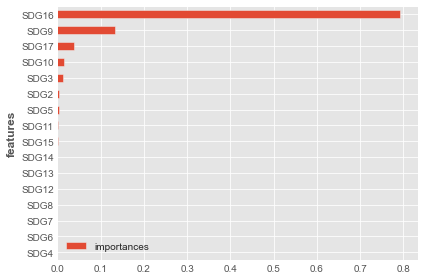

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor

X = SDGs_Scores_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

dtr = DecisionTreeRegressor(max_depth = 5, max_features = 9, random_state=42)
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

print("Coeficiente determinación Train:", r2_score(y_train, dtr.predict(X_train)))
print("MAE Train:", mean_absolute_error(y_train, dtr.predict(X_train)))
print("MAPE Train:", mean_absolute_percentage_error(y_train, dtr.predict(X_train)))
print("MSE Train:", mean_squared_error(y_train, dtr.predict(X_train)))
print("RMSE Train:", np.sqrt(mean_squared_error(y_train, dtr.predict(X_train))))

print('-'*20)

print("Coeficiente determinación Test:", r2_score(y_test, y_pred))
print("MAE Test:", mean_absolute_error(y_test, y_pred))
print("MAPE Test:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE Test:", mean_squared_error(y_test, y_pred))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))

print('Feature Importance')
importances = pd.DataFrame({'features':X_train.columns, 'importances':dtr.feature_importances_}).sort_values('importances', ascending=False)
#Visualizamos
importances.set_index('features', inplace = True)
display(importances)
importances.sort_values("importances").plot.barh(y='importances');

Los mas importantes
* SDG16. Paz, Justicia e Instituciones Sólidas = 0.41
* SDG7. Energía asequible y no Contaminante = 0.38
* SDG9. Industria Innovación e Infraestructura = 0.13

Menores que 0.05
* SDG6. Agua Limpia y Saneamiento
* SDG10. Reducción de las Desigualdades
* SDG8. Trabajo Decente y Crecimiento Económico
* SDG4. Educación y Calidad
* SDG13. Acción por el Clima

SDGs_Ranks da tambien un buen MAE Test: 196.6 (SDGs_Scores MAE Test = 167) y el feature_importances_ se asemeja